# <font color='darkred'> **Laboratorio: Filtro homomórfico**#

Un filtro homomórfico en procesamiento de imágenes tiene como objetivo separar la iluminación y el componente de reflexión en una imagen. La idea es que una imagen puede ser vista como el producto de estos dos componentes: la iluminación (que representa la luz que incide en un objeto) y la reflexión (que representa las propiedades intrínsecas del objeto, como su color o textura).

La transformada homomórfica se basa en trabajar en el dominio logarítmico, ya que el logaritmo convierte el producto de estos dos componentes en una suma, permitiendo así su separación.

# <font color='darkred'>Beneficios del filtro homomórfico:#

1. Mejora de la iluminación: Puede corregir variaciones en la iluminación, ayudando a mejorar la visibilidad de detalles oscurecidos.

2. Acentuación de detalles: Al separar y tratar por separado la iluminación y el componente de reflexión, es posible acentuar o suavizar detalles específicos en la imagen.

# <font color='darkred'> **Cargar Librerias**#

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm
from   scipy.fftpack     import fft2,ifft2,fftshift,ifftshift
from   scipy.ndimage     import gaussian_filter
from   scipy.signal      import fftconvolve

# <font color='darkred'> **Cargar Imagen**#

In [ ]:
!wget https://www.dropbox.com/s/9vtm77ouankeav0/PET.png

--2023-03-13 00:20:29--  https://www.dropbox.com/s/9vtm77ouankeav0/PET.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/9vtm77ouankeav0/PET.png [following]
--2023-03-13 00:20:29--  https://www.dropbox.com/s/raw/9vtm77ouankeav0/PET.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc64dd827139955aa820c86ee341.dl.dropboxusercontent.com/cd/0/inline/B4K3Qe9iqxcTeDQjid5sShjf1xNK9W3w0Wih0uZ9guR9yZFt32rVzGdvlnPC6uX-RrL82UP6z_iiOizLd9lmX-JZ2lzUx2V7d9NzD4IWJbauMnkd8hKDlq3KhMMwU8bPgNFFNM4K1NneXHcPxOh3sRSq7opX-W3qYWcn8gFiRFLUIA/file# [following]
--2023-03-13 00:20:30--  https://uc64dd827139955aa820c86ee341.dl.dropboxusercontent.com/cd/0/inline/B4K3Qe9iqxcTeDQjid5sShjf1xNK9W3w0Wih0uZ9guR9yZFt32rVzGdvlnPC6uX-RrL82UP6z_iiOizLd9lmX-JZ2lzU

# <font color='darkred'> **Plot de la imagen**

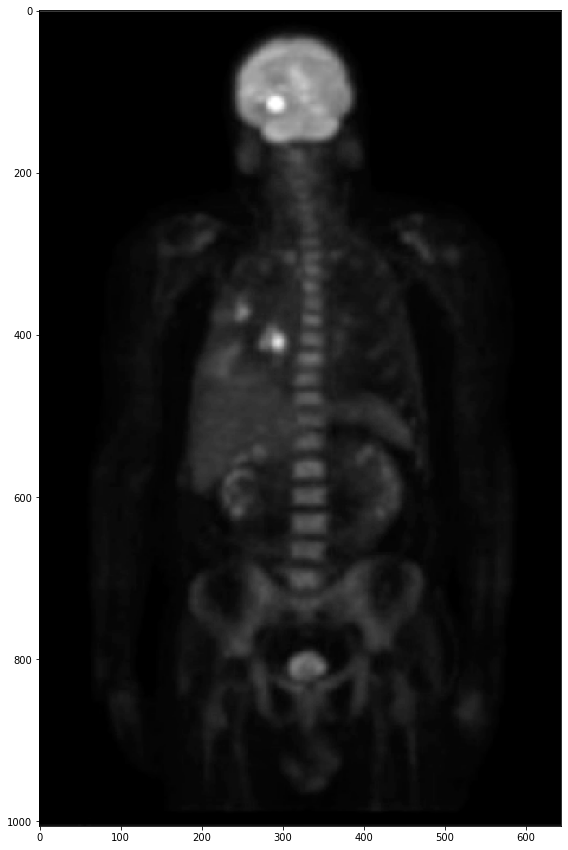

In [ ]:
X = cv2.imread('PET.png',0)
plt.figure(figsize=(30,15))
plt.imshow(X,cmap='gray')
plt.show()

# <font color='darkred'> **Define una función de un mapa de color logaritmico**

Esta función visualiza el espectro de frecuencia de una imagen o señal, y tiene la opción de centrar dicho espectro. La visualización utiliza una escala logarítmica para destacar detalles.

In [ ]:
def plot_spectrum(X_ft,centered=True):

    if centered:
      X_ftc = fftshift(X_ft)
    else:
      X_ftc = X_ft
    plt.figure(figsize=(30,15))
    plt.imshow(np.abs(X_ftc), norm=LogNorm(vmin=5))
    plt.colorbar()

# <font color='darkred'> **Prepara y genera un Filtro Homomórfico**

La forma del filtro es una combinación de un filtro de paso bajo y un filtro de paso alto, y está diseñado para realzar ciertas características de la imagen en el dominio de la frecuencia.

El filtro está diseñado para resaltar ciertas características de la imagen en el dominio de la frecuencia.

In [ ]:
f = X.astype('double')+1

(N,M) = f.shape

P = 2*N
Q = 2*M

gH = 0.5
gL = 0.2
dg = gH-gL

Do  = 2
Do2 = Do**2
c   = 0.5

D2 = np.zeros((P,Q))

H = D2

for u in range(P):
    for v in range(Q):
        D2[u,v] = ((u-P/2)**2+(v-Q/2)**2)

for u in range(P):
    for v in range(Q):
        H[u,v] = dg*(1-np.exp(-c*D2[u,v]/Do2))+gL


# <font color='darkred'> **Visualizar el espectro de una imagen en el dominio de la frecuencia**

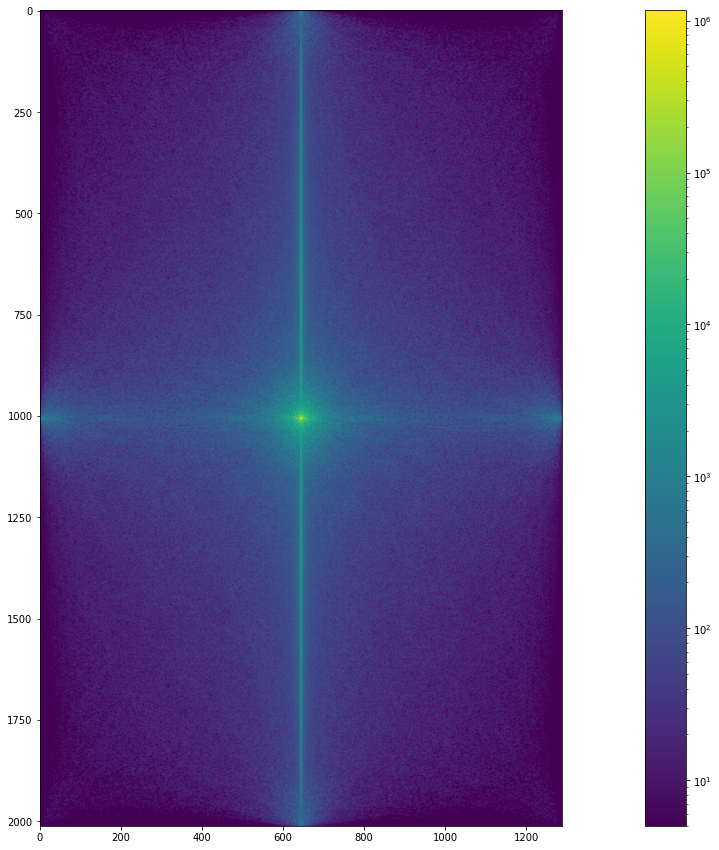

In [ ]:
z = np.log(f)

II = fft2(z, shape=(P,Q), axes=(0, 1))


# Realiza un intercambio de cuadrantes de la matriz usando fftshift. Esto mueve
# la componente de frecuencia cero al centro de la matriz. Es una operación común
# cuando se quiere visualizar el espectro de frecuencia de una imagen, ya que coloca
# las bajas frecuencias en el centro y las altas frecuencias en las esquinas.
Ipf = fftshift(II)

plot_spectrum(Ipf,centered=False)

# <font color='darkred'> **Convolución = Multiplicación en el dominio de la frecuencia**

Aplica un filtro H a una imagen en el dominio de la frecuencia y luego visualiza el espectro de frecuencia resultante. Es una forma común de ver cómo un filtro afecta el contenido de frecuencia de una imagen.

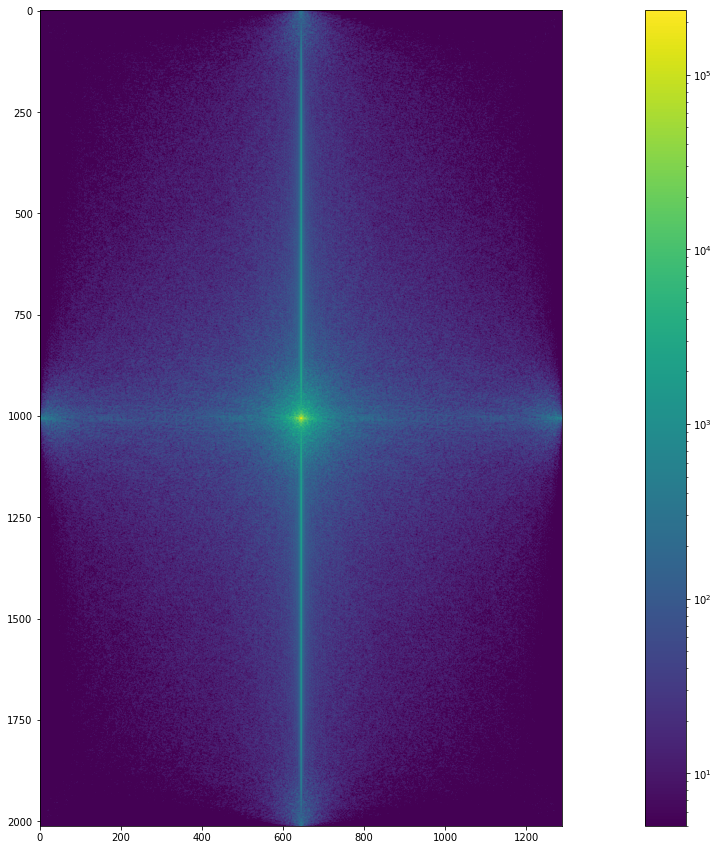

In [ ]:
It = H*Ipf

plot_spectrum(It,centered=False)

# <font color='darkred'> **Transformada inversa de Fourier**

Toma una imagen que ha sido filtrada en el dominio de la frecuencia, la convierte de nuevo al dominio espacial, revierte el logaritmo aplicado previamente, normaliza la imagen resultante y finalmente la visualiza.

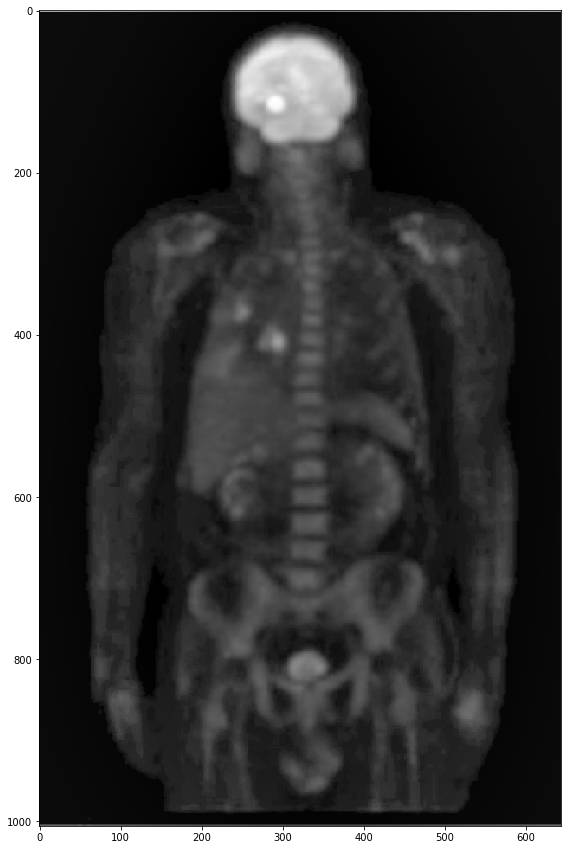

In [ ]:
T = ifftshift(It)

Jp = ifft2(T).real

# Eliminacion de parte imaginaria (despreciable aprox = 0) y
# eliminacion de parte correspondiente al zero-padding
s = Jp[0:N,0:M]

#s = s-np.min(s)+1

J = np.exp(s) #/s
J = J-np.min(J)
J = J/np.max(J)*255
plt.figure(figsize=(30,15))
plt.imshow(J,cmap = 'gray')
plt.show()

# <font color='darkred'> **Comparación**

Compara la imagen original con su versión procesada homomórficamente, poniéndolas lado a lado para una fácil comparación.

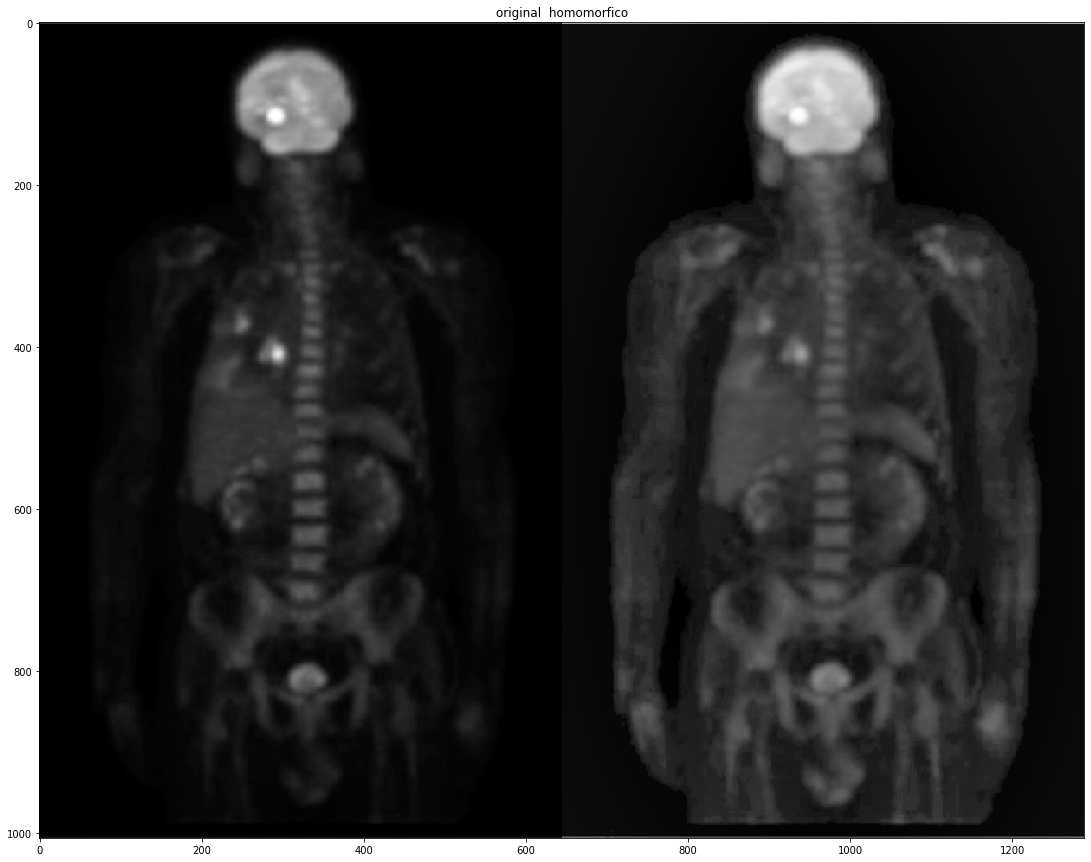

In [ ]:
(N,M) = X.shape
Z = np.hstack([X,np.zeros((N,1)),J])
plt.figure(figsize=(30,15))
plt.imshow(Z, "gray"), plt.title("original  homomorfico")
plt.show()

# <font color='darkred'> **Visualización 50% - 50%**

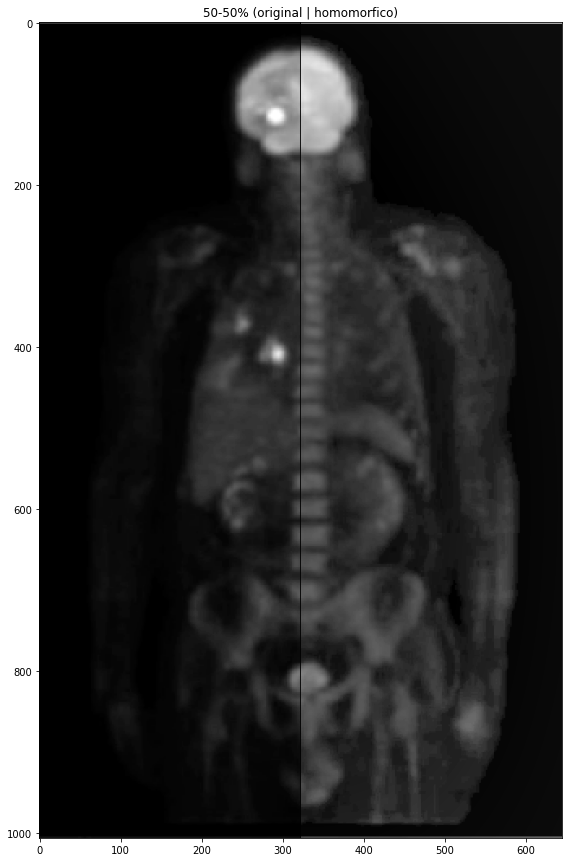

In [ ]:
M2 = int(M/2)
Z = np.hstack([X[:,0:M2],np.zeros((N,1)),J[:,M2:M]])
plt.figure(figsize=(30,15))
plt.imshow(Z, "gray"), plt.title("50-50% (original | homomorfico)")
plt.show()